In [221]:
import numpy as np
import pandas as pd
# from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, GlobalAveragePooling1D,Flatten
from sklearn.model_selection import train_test_split
# from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dropout
from tensorflow.math import confusion_matrix
import re
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import pickle

In [222]:
# stop_words = set(stopwords.words('english'))
# print(stop_words)
stop_words = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]

In [223]:
np.argmax([1,2,3,4,5,7,6,8,7,6] == max([1,2,3,4,5,7,6,8,7,6]))

0

In [224]:
df = pd.read_excel("Classification_Categorizations_1.xlsx")
df = df.dropna()
data = df[["title","m_label"]]
data.rename(columns = {'m_label':'label_2'}, inplace = True)
# data = data[data.label_2 != 'WeatherUpdate']
CATEOGARY_COUNT = data['label_2'].value_counts(normalize=False,dropna=True)

# Oversampling
data_new = pd.DataFrame([])
OVERSAMPLING_TECHNIQUE = "REPLICATE"
if OVERSAMPLING_TECHNIQUE == "REPLICATE": 
    CATEOGARIES = np.array(CATEOGARY_COUNT.index)
    COUNT_MAX_CAT = max(CATEOGARY_COUNT)

    data_new = pd.DataFrame([])
    for cat in CATEOGARIES:
        df_temp = data[data['label_2'] == cat].sample(COUNT_MAX_CAT,replace=True)
        data_new = pd.concat([data_new,df_temp],axis=0)
        
sum_temp_ = 0
CATEOGARY_COUNT = data['label_2'].value_counts(normalize=True,dropna=True)
print(CATEOGARY_COUNT)

for i in range(len(CATEOGARY_COUNT)):
    sum_temp_ += CATEOGARY_COUNT[i]
    if(sum_temp_ >= 0.5):
        break

a = list(zip(CATEOGARY_COUNT,CATEOGARY_COUNT.index))
CATEOGARY_1 = sorted([y for _,y in a[0:i+1]])
CATEOGARY_2 = sorted([y for _,y in a[i+1:]])

print("CATEOGARY-1: ",CATEOGARY_1)
print("CATEOGARY-2: ",CATEOGARY_2)

data['label_1'] = 0 

for cat in CATEOGARY_1:
    data["label_1"][(data['label_2'] == cat)] = 1

# data["label_1"][(data['label_2'] == 'Rainfall') | (data['label_2'] == 'Flood') | (data['label_2'] == 'WeatherUpdate')] = 1

# print(data['title'][data['label_2'] == 'Rainfall'])
# data["label_1"][(data['label_2'] == 'Landslide') |(data['label_2'] == 'Coldwave') |(data['label_2'] == 'BuildingCollapse') | (data['label_2'] == 'Rainfall') | (data['label_2'] == 'Earthquake') | (data['label_2'] == 'Cyclone') | (data['label_2'] == 'Heatwave')] = 1

label_2
Rainfall            0.323276
Flood               0.141343
WeatherUpdate       0.089336
Cyclone             0.071124
Earthquake          0.069765
Heatwave            0.057534
Landslide           0.047567
Coldwave            0.044940
BuildingCollapse    0.024101
Thunderstorm        0.021473
Other               0.018211
Snowfall            0.016671
BridgeCollapse      0.012413
Avalanche           0.010963
GasLeak             0.010510
TrainAccident       0.009151
BoatCapsizes        0.008064
Hailstorm           0.007883
Forestfire          0.007339
CloudBurst          0.006795
Oilspill            0.001540
Name: proportion, dtype: float64
CATEOGARY-1:  ['Flood', 'Rainfall', 'WeatherUpdate']
CATEOGARY-2:  ['Avalanche', 'BoatCapsizes', 'BridgeCollapse', 'BuildingCollapse', 'CloudBurst', 'Coldwave', 'Cyclone', 'Earthquake', 'Forestfire', 'GasLeak', 'Hailstorm', 'Heatwave', 'Landslide', 'Oilspill', 'Other', 'Snowfall', 'Thunderstorm', 'TrainAccident']


/var/folders/sy/l4qnlmjs3fv7g925fxd339rm0000gn/T/ipykernel_14449/1528674887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns = {'m_label':'label_2'}, inplace = True)
/var/folders/sy/l4qnlmjs3fv7g925fxd339rm0000gn/T/ipykernel_14449/1528674887.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum_temp_ += CATEOGARY_COUNT[i]
/var/folders/sy/l4qnlmjs3fv7g925fxd339rm0000gn/T/ipykernel_14449/1528674887.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [225]:
data = data.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stop_words)

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
data['title'] = data['title'].apply(clean_text)
data

df1 = data[['title','label_2']][data['label_1'] == 1]
print(df1)
df2 = data[['title','label_2']][data['label_1'] == 0]

                                                   title        label_2
2       relief materials coimbatore floodhit tirunelveli          Flood
3      delhis air quality poor minimum temperature 17...  WeatherUpdate
4      delhincr receive moderate rain showers continu...       Rainfall
6      mumbai weather light moderate rain continue ci...       Rainfall
7      humidity temperature increase net 2 days luckn...  WeatherUpdate
...                                                  ...            ...
11031                  chennai breather light rains days       Rainfall
11032  cloud activity recede today temperature rise g...  WeatherUpdate
11033    possibility rainfall uttarakhand july 16 17 imd       Rainfall
11035  mercury set dip maharashtra light rainfall for...       Rainfall
11036  york deluge triggers flash floods brings chaos...          Flood

[6114 rows x 2 columns]


In [226]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 20
# This is fixed.
EMBEDDING_DIM = 50

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['title'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 7002 unique tokens.


In [238]:
X = tokenizer.texts_to_sequences(data['title'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print(X[0])
print('Shape of data tensor:', X.shape)

X1 = tokenizer.texts_to_sequences(df1['title'].values)
X1 = pad_sequences(X1, maxlen=2*MAX_SEQUENCE_LENGTH)
print('Shape of X1 tensor:', X1.shape)

X2 = tokenizer.texts_to_sequences(df2['title'].values)
X2 = pad_sequences(X2, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of X2 tensor:', X2.shape)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0  29  92  82 161
  40 224]
Shape of data tensor: (11037, 20)
Shape of X1 tensor: (6114, 40)
Shape of X2 tensor: (4923, 20)


In [228]:
Y = pd.get_dummies(data['label_1']).values
print('Shape of label tensor:', Y.shape)
N = Y.shape[1]

Y1 = pd.get_dummies(df1['label_2']).values
print('Shape of label tensor:', Y1.shape)
N1 = Y1.shape[1]

Y2 = pd.get_dummies(df2['label_2']).values
print('Shape of label tensor:', Y2.shape)
N2 = Y2.shape[1] 

# strategy = {0:100, 1:100, 2:200, 3:200, 4:200, 5:200}


Shape of label tensor: (11037, 2)
Shape of label tensor: (6114, 3)
Shape of label tensor: (4923, 18)


In [229]:
print(Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 42,stratify=Y)
print("Training Set",X_train.shape,Y_train.shape)
print("Test set",X_test.shape,Y_test.shape)

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size = 0.1, random_state = 42,stratify=Y1)
print("Training Set",X1_train.shape,Y1_train.shape)
print("Test set",X1_test.shape,Y1_test.shape)
print(np.sum(Y1,axis=0))
print(np.sum(Y1_train,axis=0))
print(np.sum(Y1_test,axis=0))

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2, test_size = 0.1, random_state = 42,stratify=Y2)
print("Training Set",X2_train.shape,Y2_train.shape)
print("Test set",X2_test.shape,Y2_test.shape)
print(np.sum(Y2,axis=0))
print(np.sum(Y2_train,axis=0))
print(np.sum(Y2_test,axis=0))

(11037, 2)
Training Set (9933, 20) (9933, 2)
Test set (1104, 20) (1104, 2)
Training Set (5502, 40) (5502, 3)
Test set (612, 40) (612, 3)
[1560 3568  986]
[1404 3211  887]
[156 357  99]
Training Set (4430, 20) (4430, 18)
Test set (493, 20) (493, 18)
[121  89 137 266  75 496 785 770  81 116  87 635 525  17 201 184 237 101]
[109  80 123 239  68 446 706 693  73 104  78 572 473  15 181 166 213  91]
[12  9 14 27  7 50 79 77  8 12  9 63 52  2 20 18 24 10]


In [230]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))

model.add(SpatialDropout1D(0.6))
model.add(LSTM(10, dropout=0.6, recurrent_dropout=0.4))

# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(2, activation='sigmoid'))

# model.add(GlobalAveragePooling1D())

model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

model1 = Sequential()
model1.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X1.shape[1]))
model1.add(SpatialDropout1D(0.6))
model1.add(LSTM(30, dropout=0.3, recurrent_dropout=0.4))

# model1.add(GlobalAveragePooling1D())
model1.add(Dense(N1, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

model2 = Sequential()
model2.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X2.shape[1]))
model2.add(SpatialDropout1D(0.4))
model2.add(LSTM(50, dropout=0.4, recurrent_dropout=0.4))
model2.add(Dense(N2, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_45 (Embedding)    (None, 20, 50)            2500000   
                                                                 
 spatial_dropout1d_45 (Spat  (None, 20, 50)            0         
 ialDropout1D)                                                   
                                                                 
 lstm_45 (LSTM)              (None, 10)                2440      
                                                                 
 dense_45 (Dense)            (None, 2)                 22        
                                                                 
Total params: 2502462 (9.55 MB)
Trainable params: 2502462 (9.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Model: "sequential_46"
_____________________________________________________

In [231]:
epochs = 100
batch_size = 32

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001,restore_best_weights = True)])

history1 = model1.fit(X1_train, Y1_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001,restore_best_weights = True)])

history2 = model2.fit(X2_train, Y2_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001,restore_best_weights = True)])

Epoch 1/100
280/280 [==============================] - 6s 14ms/step - loss: 0.5153 - accuracy: 0.7430 - val_loss: 0.2454 - val_accuracy: 0.9296
Epoch 2/100
280/280 [==============================] - 3s 12ms/step - loss: 0.2179 - accuracy: 0.9249 - val_loss: 0.1509 - val_accuracy: 0.9447
Epoch 3/100
280/280 [==============================] - 3s 11ms/step - loss: 0.1609 - accuracy: 0.9437 - val_loss: 0.1286 - val_accuracy: 0.9567
Epoch 4/100
280/280 [==============================] - 3s 11ms/step - loss: 0.1337 - accuracy: 0.9564 - val_loss: 0.1272 - val_accuracy: 0.9588
Epoch 5/100
280/280 [==============================] - 3s 11ms/step - loss: 0.1243 - accuracy: 0.9565 - val_loss: 0.1170 - val_accuracy: 0.9648
Epoch 6/100
280/280 [==============================] - 3s 11ms/step - loss: 0.1105 - accuracy: 0.9632 - val_loss: 0.1180 - val_accuracy: 0.9658
Epoch 7/100
280/280 [==============================] - 3s 11ms/step - loss: 0.1050 - accuracy: 0.9660 - val_loss: 0.1222 - val_accuracy:

In [232]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))
y_pred = model.predict(X_test)
confusion = confusion_matrix(np.argmax(Y_test, axis = 1), np.argmax(y_pred, axis = 1))
print(confusion)
precision = precision_score(np.argmax(Y_test, axis = 1), np.argmax(y_pred, axis = 1),average=None)
recall = recall_score(np.argmax(Y_test, axis = 1), np.argmax(y_pred, axis = 1),average=None)
f1score = f1_score(np.argmax(Y_test, axis = 1), np.argmax(y_pred, axis = 1),average=None)
print("precision: ",precision)
print("recall: ",recall)
print("f1-score: ",f1score)

accr = model1.evaluate(X1_test,Y1_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))
y_pred = model1.predict(X1_test)
confusion = confusion_matrix(labels=np.argmax(Y1_test, axis = 1), predictions=np.argmax(y_pred, axis = 1))
print(confusion)
precision = precision_score(np.argmax(Y1_test, axis = 1), np.argmax(y_pred, axis = 1),average=None)
recall = recall_score(np.argmax(Y1_test, axis = 1), np.argmax(y_pred, axis = 1),average=None)
f1score = f1_score(np.argmax(Y1_test, axis = 1), np.argmax(y_pred, axis = 1),average=None)
print("precision: ",precision)
print("recall: ",recall)
print("f1-score: ",f1score)

accr = model2.evaluate(X2_test,Y2_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))
y_pred = model2.predict(X2_test)
confusion = confusion_matrix(labels=np.argmax(Y2_test, axis = 1), predictions=np.argmax(y_pred, axis = 1))
print(confusion)
precision = precision_score(np.argmax(Y2_test, axis = 1), np.argmax(y_pred, axis = 1),average=None)
recall = recall_score(np.argmax(Y2_test, axis = 1), np.argmax(y_pred, axis = 1),average=None)
f1score = f1_score(np.argmax(Y2_test, axis = 1), np.argmax(y_pred, axis = 1),average=None)
print("precision: ",precision)
print("recall: ",recall)
print("f1-score: ",f1score)

35/35 [==============================] - 0s 992us/step - loss: 0.1498 - accuracy: 0.9556
Test set
  Loss: 0.150
  Accuracy: 0.956
35/35 [==============================] - 0s 942us/step
tf.Tensor(
[[463  29]
 [ 20 592]], shape=(2, 2), dtype=int32)
precision:  [0.95859213 0.95330113]
recall:  [0.94105691 0.96732026]
f1-score:  [0.94974359 0.96025953]
20/20 [==============================] - 0s 2ms/step - loss: 0.1651 - accuracy: 0.9493
Test set
  Loss: 0.165
  Accuracy: 0.949
20/20 [==============================] - 0s 2ms/step
tf.Tensor(
[[150   6   0]
 [  6 343   8]
 [  0  11  88]], shape=(3, 3), dtype=int32)
precision:  [0.96153846 0.95277778 0.91666667]
recall:  [0.96153846 0.96078431 0.88888889]
f1-score:  [0.96153846 0.9567643  0.9025641 ]
16/16 [==============================] - 0s 2ms/step - loss: 0.1872 - accuracy: 0.9655
Test set
  Loss: 0.187
  Accuracy: 0.966
16/16 [==============================] - 0s 1ms/step
tf.Tensor(
[[12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


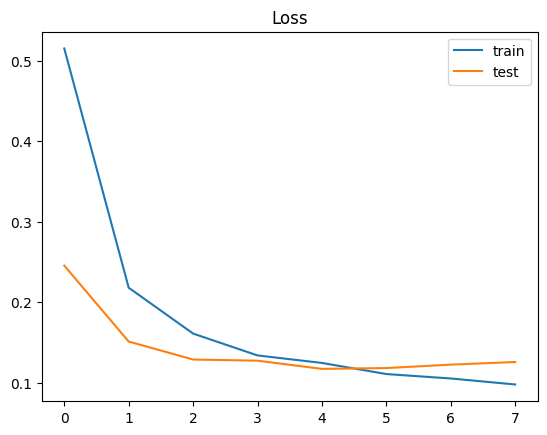

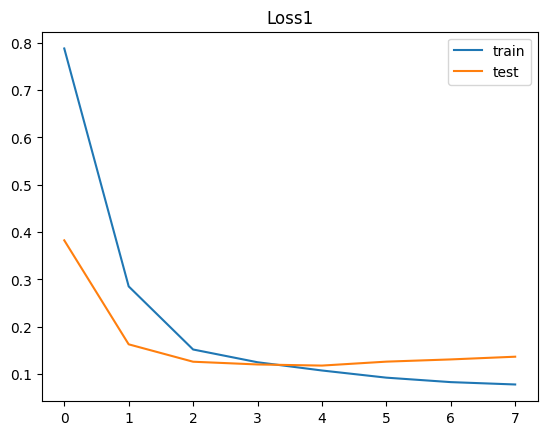

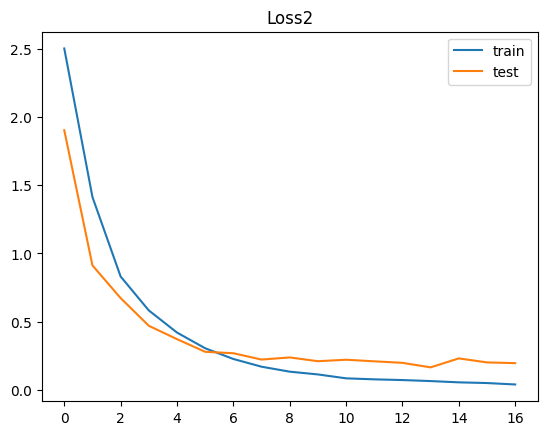

In [233]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

plt.title('Loss1')
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.legend()
plt.show()

plt.title('Loss2')
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()

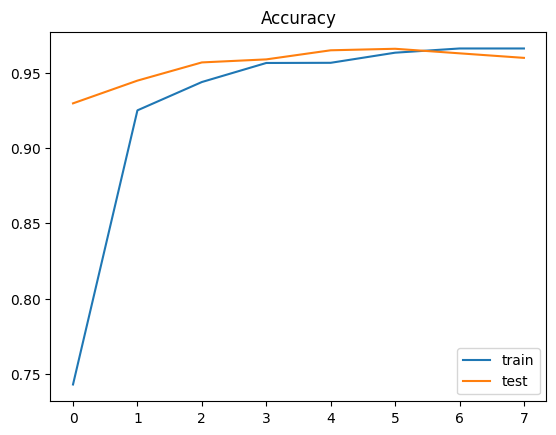

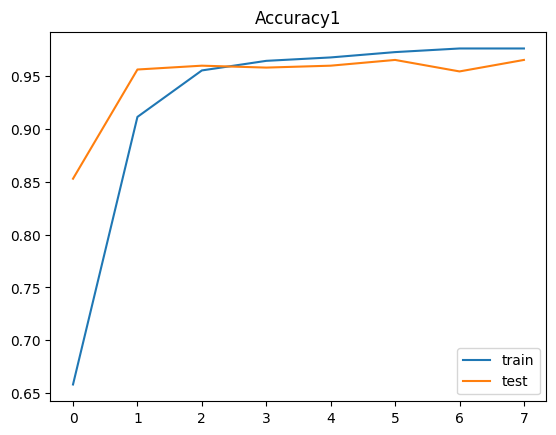

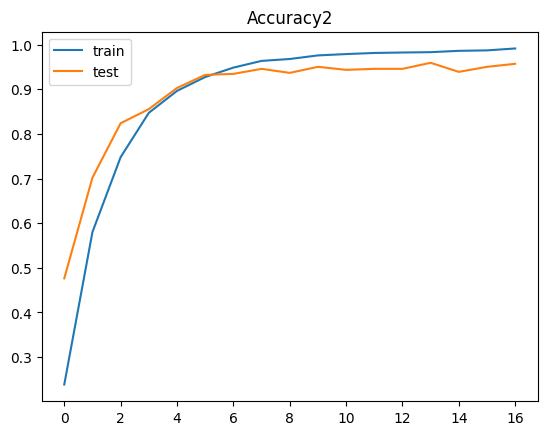

In [234]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

plt.title('Accuracy1')
plt.plot(history1.history['accuracy'], label='train')
plt.plot(history1.history['val_accuracy'], label='test')
plt.legend()
plt.show()

plt.title('Accuracy2')
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [235]:
news = ['Two killed, seven injured in stampede at Una shrine following landslide in Himachal Pradesh']
seq = tokenizer.texts_to_sequences(news)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)

pred_1 = np.argmax(model.predict(padded))
if(pred_1 == 0):
    # CAT-2
    pred2 = np.argmax(model2.predict(padded))
    print(CATEOGARY_2[pred2])
if(pred_1 == 1):
    # CAT-1
    pred2 = np.argmax(model1.predict(padded))
    print(CATEOGARY_1[pred2])


1/1 [==============================] - 0s 10ms/step
Landslide


In [236]:
model_pkl_file = "model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

model_pkl_file = "model1.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model1, file)

model_pkl_file = "model2.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model2, file)

In [237]:
model_pkl_file = "model.pkl"  
with open(model_pkl_file, 'rb') as file:  
    model_loaded = pickle.load(file)

model_pkl_file = "model1.pkl"  
with open(model_pkl_file, 'rb') as file:  
    model1_loaded = pickle.load(file)

model_pkl_file = "model2.pkl"  
with open(model_pkl_file, 'rb') as file:  
    model2_loaded = pickle.load(file)

news = ['2 killed as heavy rainfall causes 15 house/wall collapse incidents in Delhi']
seq = tokenizer.texts_to_sequences(news)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)

pred_1 = np.argmax(model_loaded.predict(padded))
if(pred_1 == 0):
    # CAT-2
    pred2 = np.argmax(model2_loaded.predict(padded))
    print(CATEOGARY_2[pred2])
if(pred_1 == 1):
    # CAT-1
    pred2 = np.argmax(model1_loaded.predict(padded))
    print(CATEOGARY_1[pred2])


1/1 [==============================] - 0s 125ms/step


ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_46" is incompatible with the layer: expected shape=(None, 40), found shape=(None, 20)
